In [1]:
import pandas as pd
df = pd.read_csv('data/compas-scores-raw.csv')

In [2]:
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Person_ID,60843.0,53683.206154,14363.648515,656.00,52039.00,57321.00,62748.0,68608.0
AssessmentID,60843.0,68061.029190,7320.208226,649.00,62582.00,68229.00,73870.0,79678.0
Case_ID,60843.0,60209.128149,9638.501654,350.00,56021.00,61261.00,66554.0,72045.0
ScaleSet_ID,60843.0,21.819536,0.932614,17.00,22.00,22.00,22.0,22.0
RecSupervisionLevel,60843.0,1.630048,0.944220,1.00,1.00,1.00,2.0,4.0
Scale_ID,60843.0,11.000000,4.966596,7.00,7.00,8.00,18.0,18.0
RawScore,60843.0,5.081457,10.080518,-4.79,-2.09,-0.71,14.0,51.0
DecileScore,60843.0,3.571701,2.617854,-1.00,1.00,3.00,5.0,10.0
IsCompleted,60843.0,1.000000,0.000000,1.00,1.00,1.00,1.0,1.0
IsDeleted,60843.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15624 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

# Check number of null for each column

In [5]:
df.isnull().sum()

Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45219
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
dtype: int64

## Calculate age from DOB and Screening Date

In [6]:
# Found an entry where DoB was 2018, this entry will be removed.
person_id_filter = df['Person_ID'] == 54272
result_df = df[person_id_filter]
print(result_df)
df = df[df['Person_ID'] != 54272]

       Person_ID  AssessmentID  Case_ID Agency_Text   LastName FirstName  \
12000      54272         61547    55871    PRETRIAL  Lightfoot     Corey   
12001      54272         61547    55871    PRETRIAL  Lightfoot     Corey   
12002      54272         61547    55871    PRETRIAL  Lightfoot     Corey   

      MiddleName Sex_Code_Text  Ethnic_Code_Text DateOfBirth  ...  \
12000        NaN          Male  African-American    11/04/18  ...   
12001        NaN          Male  African-American    11/04/18  ...   
12002        NaN          Male  African-American    11/04/18  ...   

       RecSupervisionLevel RecSupervisionLevelText Scale_ID  \
12000                    1                     Low        7   
12001                    1                     Low        8   
12002                    1                     Low       18   

                     DisplayText RawScore DecileScore ScoreText  \
12000           Risk of Violence    -3.53           1       Low   
12001         Risk of Recidivis

In [7]:
# DateOfBirth has values like 10/1/1977, 08/31/80, 08/14/90, 1/3/1986
# to standardise, we shall extract the last 2 characters and park them in a new column "BirthYear"
df['BirthYear'] = df['DateOfBirth'].str[-2:]

# Convert BirthYear to numeric
df['BirthYear'] = pd.to_numeric(df['BirthYear'], errors='coerce')

# Add '19' to the values in 'BirthYear'
df['BirthYear'] = df['BirthYear'].apply(lambda x: x + 1900)


# Display the updated DataFrame
print(df[['DateOfBirth', 'BirthYear']])

# To check, we should investigate the earliest and latest birthYear.
min_birth_year = df['BirthYear'].min()
max_birth_year = df['BirthYear'].max()

print("Lowest Birth Year:", min_birth_year)
print("Highest Birth Year:", max_birth_year)

      DateOfBirth  BirthYear
0        12/05/92       1992
1        12/05/92       1992
2        12/05/92       1992
3        09/16/84       1984
4        09/16/84       1984
...           ...        ...
60838    06/21/64       1964
60839    06/21/64       1964
60840    02/06/85       1985
60841    02/06/85       1985
60842    02/06/85       1985

[60840 rows x 2 columns]
Lowest Birth Year: 1919
Highest Birth Year: 1998


In [8]:
# Screening_Date has values like 3/31/14 0:00 and 10/3/2013 0:00
# to standardise, we shall extract the last 2 characters and park them in a new column "ScreeningYear"

# Convert 'Screening_Date' to datetime
df['Screening_Date'] = pd.to_datetime(df['Screening_Date'], errors='coerce')

# Extract the year and ensure it is in four-digit format
df['ScreeningYear'] = df['Screening_Date'].dt.year.apply(lambda x: x if x >= 1000 else x + 2000)

/var/folders/dq/43_5rtyn5lz1p4vkq89ykdw40000gn/T/ipykernel_20965/2496178208.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Screening_Date'] = pd.to_datetime(df['Screening_Date'], errors='coerce')


In [9]:
from datetime import datetime

# Calculate age and create a new column "Age"
df['Age'] = df['ScreeningYear'] - df['BirthYear']
df['Age']

0        21
1        21
2        21
3        29
4        29
         ..
60838    50
60839    50
60840    29
60841    29
60842    29
Name: Age, Length: 60840, dtype: int64

In [10]:
# Define age bins and labels
bins = [15, 24, 64, 100]
labels = ['1', '2', '3']

# Create the "AgeGroup" column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60840 entries, 0 to 60842
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Person_ID                60840 non-null  int64         
 1   AssessmentID             60840 non-null  int64         
 2   Case_ID                  60840 non-null  int64         
 3   Agency_Text              60840 non-null  object        
 4   LastName                 60840 non-null  object        
 5   FirstName                60840 non-null  object        
 6   MiddleName               15624 non-null  object        
 7   Sex_Code_Text            60840 non-null  object        
 8   Ethnic_Code_Text         60840 non-null  object        
 9   DateOfBirth              60840 non-null  object        
 10  ScaleSet_ID              60840 non-null  int64         
 11  ScaleSet                 60840 non-null  object        
 12  AssessmentReason         60840 non-nu

# Dropped column that has no decile score

In [12]:
df_cleaned = df.dropna(subset=['ScoreText'])

In [13]:
df_cleaned.isnull().sum()

Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45180
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                      0
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
BirthYear                      0
ScreeningYear                  0
Age       

In [14]:
data_types = df_cleaned.dtypes
print(data_types)

Person_ID                           int64
AssessmentID                        int64
Case_ID                             int64
Agency_Text                        object
LastName                           object
FirstName                          object
MiddleName                         object
Sex_Code_Text                      object
Ethnic_Code_Text                   object
DateOfBirth                        object
ScaleSet_ID                         int64
ScaleSet                           object
AssessmentReason                   object
Language                           object
LegalStatus                        object
CustodyStatus                      object
MaritalStatus                      object
Screening_Date             datetime64[ns]
RecSupervisionLevel                 int64
RecSupervisionLevelText            object
Scale_ID                            int64
DisplayText                        object
RawScore                          float64
DecileScore                       

In [15]:
for column in df_cleaned.columns:
    unique_values = df_cleaned[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Person_ID: [50844 50848 50855 ... 68595 68598 68603]
Unique values in AssessmentID: [57167 57174 57181 ... 79660 79665 79669]
Unique values in Case_ID: [51950 51956 51963 ... 72035 72038 72042]
Unique values in Agency_Text: ['PRETRIAL' 'Probation' 'DRRD' 'Broward County']
Unique values in LastName: ['Fisher' 'KENDALL' 'DAYES' ... 'WEBLEY' 'Sime' 'PENTO']
Unique values in FirstName: ['Kevin' 'KEVIN' 'DANIEL' ... 'STERN' 'krishna' 'Viki']
Unique values in MiddleName: [nan 'George' 'Nicole' ... 'Wilmington' 'SHEREE' 'THEOPHILUS']
Unique values in Sex_Code_Text: ['Male' 'Female']
Unique values in Ethnic_Code_Text: ['Caucasian' 'African-American' 'Hispanic' 'Other' 'Asian' 'African-Am'
 'Native American' 'Oriental' 'Arabic']
Unique values in DateOfBirth: ['12/05/92' '09/16/84' '08/25/94' ... '07/07/72' '06/26/94' '08/09/87']
Unique values in ScaleSet_ID: [22 17]
Unique values in ScaleSet: ['Risk and Prescreen' 'All Scales']
Unique values in AssessmentReason: ['Intake']
Uniq

## Combining African_Am and African_American

In [16]:
df_cleaned["Ethnic_Code_Text"].replace({"African-Am": "African-American"}, inplace=True)
print("For Ethnic_Code_Text variable")
print(df_cleaned["Ethnic_Code_Text"].unique())
print(df_cleaned["Ethnic_Code_Text"].value_counts())

For Ethnic_Code_Text variable
['Caucasian' 'African-American' 'Hispanic' 'Other' 'Asian'
 'Native American' 'Oriental' 'Arabic']
Ethnic_Code_Text
African-American    27050
Caucasian           21765
Hispanic             8733
Other                2590
Asian                 324
Native American       219
Arabic                 75
Oriental               39
Name: count, dtype: int64


/var/folders/dq/43_5rtyn5lz1p4vkq89ykdw40000gn/T/ipykernel_20965/3464560337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Ethnic_Code_Text"].replace({"African-Am": "African-American"}, inplace=True)
/var/folders/dq/43_5rtyn5lz1p4vkq89ykdw40000gn/T/ipykernel_20965/3464560337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

## One Hot Encoding

In [17]:
df_OHE = df_cleaned
df_encoded = pd.get_dummies(df_OHE, columns=['Agency_Text','Sex_Code_Text','Ethnic_Code_Text','ScaleSet','Language','LegalStatus','CustodyStatus','MaritalStatus','DisplayText'])
print(df_cleaned.shape)
print(df_encoded.shape)
print(df_encoded)

(60795, 32)
(60795, 64)
       Person_ID  AssessmentID  Case_ID LastName FirstName MiddleName  \
0          50844         57167    51950   Fisher     Kevin        NaN   
1          50844         57167    51950   Fisher     Kevin        NaN   
2          50844         57167    51950   Fisher     Kevin        NaN   
3          50848         57174    51956  KENDALL     KEVIN        NaN   
4          50848         57174    51956  KENDALL     KEVIN        NaN   
...          ...           ...      ...      ...       ...        ...   
60838      65667         79665    72038     West     James        NaN   
60839      65667         79665    72038     West     James        NaN   
60840      68603         79669    72042     Ryan   Michael        NaN   
60841      68603         79669    72042     Ryan   Michael        NaN   
60842      68603         79669    72042     Ryan   Michael        NaN   

      DateOfBirth  ScaleSet_ID AssessmentReason Screening_Date  ...  \
0        12/05/92           

## Check for duplicates

In [18]:
duplicate_rows = df_encoded[df_encoded.duplicated()]
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [Person_ID, AssessmentID, Case_ID, LastName, FirstName, MiddleName, DateOfBirth, ScaleSet_ID, AssessmentReason, Screening_Date, RecSupervisionLevel, RecSupervisionLevelText, Scale_ID, RawScore, DecileScore, ScoreText, AssessmentType, IsCompleted, IsDeleted, BirthYear, ScreeningYear, Age, AgeGroup, Agency_Text_Broward County, Agency_Text_DRRD, Agency_Text_PRETRIAL, Agency_Text_Probation, Sex_Code_Text_Female, Sex_Code_Text_Male, Ethnic_Code_Text_African-American, Ethnic_Code_Text_Arabic, Ethnic_Code_Text_Asian, Ethnic_Code_Text_Caucasian, Ethnic_Code_Text_Hispanic, Ethnic_Code_Text_Native American, Ethnic_Code_Text_Oriental, Ethnic_Code_Text_Other, ScaleSet_All Scales, ScaleSet_Risk and Prescreen, Language_English, Language_Spanish, LegalStatus_Conditional Release, LegalStatus_Deferred Sentencing, LegalStatus_Other, LegalStatus_Parole Violator, LegalStatus_Post Sentence, LegalStatus_Pretrial, LegalStatus_Probation Violator

## Drop unneccesary columns

In [19]:
columns_to_drop_decilescore = ['Person_ID','AssessmentID','Case_ID','LastName','FirstName','MiddleName','DateOfBirth','ScaleSet_ID','AssessmentReason','Screening_Date','RecSupervisionLevelText','Scale_ID','BirthYear','ScreeningYear','RecSupervisionLevel','ScoreText','AssessmentType','IsCompleted','IsDeleted']
columns_to_drop_scoretext = ['Person_ID','AssessmentID','Case_ID','LastName','FirstName','MiddleName','DateOfBirth','ScaleSet_ID','AssessmentReason','Screening_Date','RecSupervisionLevelText','Scale_ID','BirthYear','ScreeningYear','RecSupervisionLevel','DecileScore','AssessmentType','IsCompleted','IsDeleted']

df_dropped_decilescore = df_encoded.drop(columns=columns_to_drop_decilescore)
df_dropped_scoretext = df_encoded.drop(columns=columns_to_drop_scoretext)

In [20]:
df_dropped_decilescore.info()
df_dropped_scoretext.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60795 entries, 0 to 60842
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   RawScore                               60795 non-null  float64 
 1   DecileScore                            60795 non-null  int64   
 2   Age                                    60795 non-null  int64   
 3   AgeGroup                               60795 non-null  category
 4   Agency_Text_Broward County             60795 non-null  bool    
 5   Agency_Text_DRRD                       60795 non-null  bool    
 6   Agency_Text_PRETRIAL                   60795 non-null  bool    
 7   Agency_Text_Probation                  60795 non-null  bool    
 8   Sex_Code_Text_Female                   60795 non-null  bool    
 9   Sex_Code_Text_Male                     60795 non-null  bool    
 10  Ethnic_Code_Text_African-American      60795 non-null  bool    

In [21]:
df_dropped_decilescore.to_csv('data/processed_decile_score.csv')

## Training model to predict Decile Score

In [22]:
from sklearn.model_selection import train_test_split

target_column = 'DecileScore'

X = df_dropped_decilescore.loc[:, df_dropped_decilescore.columns != target_column]
y = df_dropped_decilescore[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36477 entries, 40651 to 56469
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   RawScore                               36477 non-null  float64 
 1   Age                                    36477 non-null  int64   
 2   AgeGroup                               36477 non-null  category
 3   Agency_Text_Broward County             36477 non-null  bool    
 4   Agency_Text_DRRD                       36477 non-null  bool    
 5   Agency_Text_PRETRIAL                   36477 non-null  bool    
 6   Agency_Text_Probation                  36477 non-null  bool    
 7   Sex_Code_Text_Female                   36477 non-null  bool    
 8   Sex_Code_Text_Male                     36477 non-null  bool    
 9   Ethnic_Code_Text_African-American      36477 non-null  bool    
 10  Ethnic_Code_Text_Arabic                36477 non-null  bool

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn

In [25]:
C = 0.001

In [26]:
# clf_decilescore = SVC(kernel='linear')

# clf_decilescore.fit(X_train,y_train)

logistic_model_decilescore = LogisticRegression(solver='sag', max_iter=100, penalty="l2", C=C)

logistic_model_decilescore.fit(X_train,y_train)

LogisticRegression(C=0.001, solver='sag')

In [27]:
import pickle

pickle.dump(logistic_model_decilescore, open('models/decilescore.pkl', 'wb'))

In [28]:
y_train_pred = logistic_model_decilescore.predict(X_train)

y_test_pred = logistic_model_decilescore.predict(X_test)

train_comparison = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})


print("Train Set - Actual vs Predicted:")
print(train_comparison)

print("\nTest Set - Actual vs Predicted:")
print(test_comparison)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('\nTrain Accuracy: {:.2f}%'.format(accuracy_train * 100))
print('Test Accuracy: {:.2f}%'.format(accuracy_test * 100))

Train Set - Actual vs Predicted:
       Actual  Predicted
40651       5          2
53253       4          1
56516       2          1
55263       2          1
13564       4          1
...       ...        ...
54388       2          1
38200       1          1
860         4          1
15814       1          1
56469       2          1

[36477 rows x 2 columns]

Test Set - Actual vs Predicted:
       Actual  Predicted
37258       1          1
51138       2          1
8479        1          1
1334        3          3
47868       4          1
...       ...        ...
13369       2          1
43238       5          3
27584       1          3
56390       2          3
43321       1          1

[24318 rows x 2 columns]

Train Accuracy: 33.00%
Test Accuracy: 32.91%


In [29]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix


array([[6910,   41,  426,    0,    0,    0,    0,    0,    0,    0],
       [2892,  222,  481,   30,    0,    0,    0,    0,    0,    0],
       [2321,  277,  761,   87,    0,    0,    0,    0,    0,    0],
       [1426,  281,  333,  109,    0,    0,    0,    0,    0,    0],
       [1182,  217,  431,  133,    0,    0,    0,    0,    0,    0],
       [ 926,  197,  389,  151,    0,    0,    0,    0,    0,    0],
       [ 659,  240,  293,  136,    0,    0,    0,    0,    0,    0],
       [ 490,  217,  324,  130,    0,    0,    0,    0,    0,    0],
       [ 369,  207,  221,  152,    1,    0,    0,    0,    0,    0],
       [ 153,  186,  202,  109,    6,    0,    0,    0,    0,    0]])

Text(0.5, 427.9555555555555, 'Predicted label')

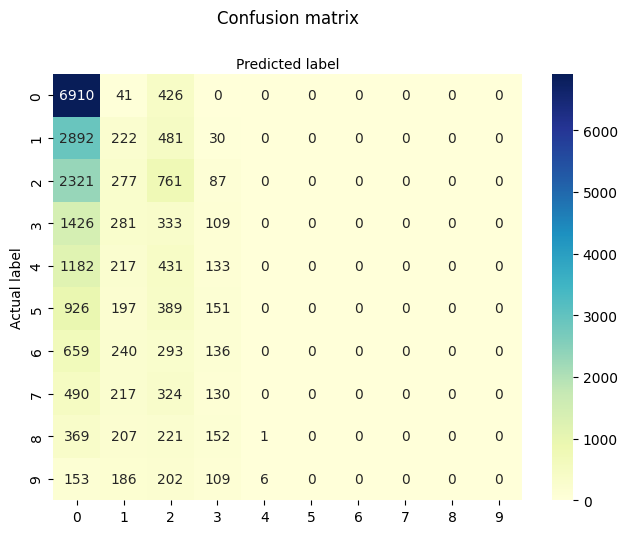

In [30]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

<Axes: ylabel='Feature'>

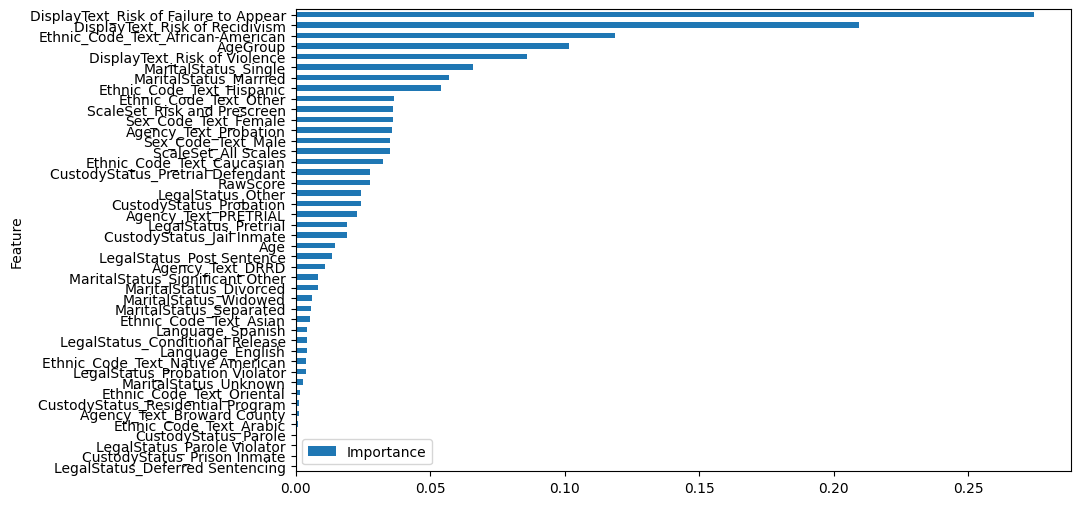

In [31]:
coefficients = logistic_model_decilescore.coef_

# print("Coefficients:")
# for i, feature in enumerate(X.columns):
#     print(f"{feature}: {coefficients[0, i]}")

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

## Training model to predict Score Text

In [32]:
from sklearn.model_selection import train_test_split

target_column = 'ScoreText'

X = df_dropped_scoretext.loc[:, df_dropped_scoretext.columns != target_column]
y = df_dropped_scoretext[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36477 entries, 40651 to 56469
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   RawScore                               36477 non-null  float64 
 1   Age                                    36477 non-null  int64   
 2   AgeGroup                               36477 non-null  category
 3   Agency_Text_Broward County             36477 non-null  bool    
 4   Agency_Text_DRRD                       36477 non-null  bool    
 5   Agency_Text_PRETRIAL                   36477 non-null  bool    
 6   Agency_Text_Probation                  36477 non-null  bool    
 7   Sex_Code_Text_Female                   36477 non-null  bool    
 8   Sex_Code_Text_Male                     36477 non-null  bool    
 9   Ethnic_Code_Text_African-American      36477 non-null  bool    
 10  Ethnic_Code_Text_Arabic                36477 non-null  bool

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn

In [35]:
logistic_model_scoretext = LogisticRegression(solver='sag', max_iter=100, penalty="l2", C=C)

logistic_model_scoretext.fit(X_train,y_train)

LogisticRegression(C=0.001, solver='sag')

In [36]:
y_train_pred = logistic_model_scoretext.predict(X_train)

y_test_pred = logistic_model_scoretext.predict(X_test)

train_comparison = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})


print("Train Set - Actual vs Predicted:")
print(train_comparison)

print("\nTest Set - Actual vs Predicted:")
print(test_comparison)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('\nTrain Accuracy: {:.2f}%'.format(accuracy_train * 100))
print('Test Accuracy: {:.2f}%'.format(accuracy_test * 100))

Train Set - Actual vs Predicted:
       Actual Predicted
40651  Medium       Low
53253     Low       Low
56516     Low       Low
55263     Low       Low
13564     Low       Low
...       ...       ...
54388     Low       Low
38200     Low       Low
860       Low       Low
15814     Low       Low
56469     Low       Low

[36477 rows x 2 columns]

Test Set - Actual vs Predicted:
       Actual Predicted
37258     Low       Low
51138     Low       Low
8479      Low       Low
1334      Low       Low
47868     Low       Low
...       ...       ...
13369     Low       Low
43238  Medium       Low
27584     Low       Low
56390     Low       Low
43321     Low       Low

[24318 rows x 2 columns]

Train Accuracy: 69.40%
Test Accuracy: 69.39%


Text(0.5, 427.9555555555555, 'Predicted label')

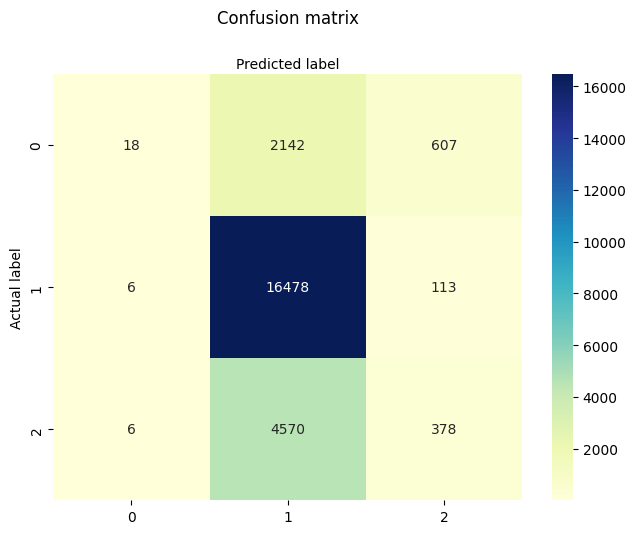

In [37]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

Coefficients:
RawScore: 0.049052814062911385
Age: -0.014657813154368851
AgeGroup: -0.11098620642632996
Agency_Text_Broward County: 0.004781404359284674
Agency_Text_DRRD: 0.013936350935375754
Agency_Text_PRETRIAL: 0.043974299240614
Agency_Text_Probation: -0.06458440771942568
Sex_Code_Text_Female: -0.06591296949439121
Sex_Code_Text_Male: 0.06402061631023805
Ethnic_Code_Text_African-American: 0.20643352903397158
Ethnic_Code_Text_Arabic: -0.0023809480719382574
Ethnic_Code_Text_Asian: -0.004744571238448666
Ethnic_Code_Text_Caucasian: -0.04724763086039211
Ethnic_Code_Text_Hispanic: -0.08805099439831361
Ethnic_Code_Text_Native American: 0.00679323086820364
Ethnic_Code_Text_Oriental: -0.002419910514193822
Ethnic_Code_Text_Other: -0.0702750580030479
ScaleSet_All Scales: 0.10879061103921012
ScaleSet_Risk and Prescreen: -0.11068296422336829
Language_English: 0.005531269149288923
Language_Spanish: -0.007423622333444779
LegalStatus_Conditional Release: 0.0009624111937974674
LegalStatus_Deferred Sen

<Axes: ylabel='Feature'>

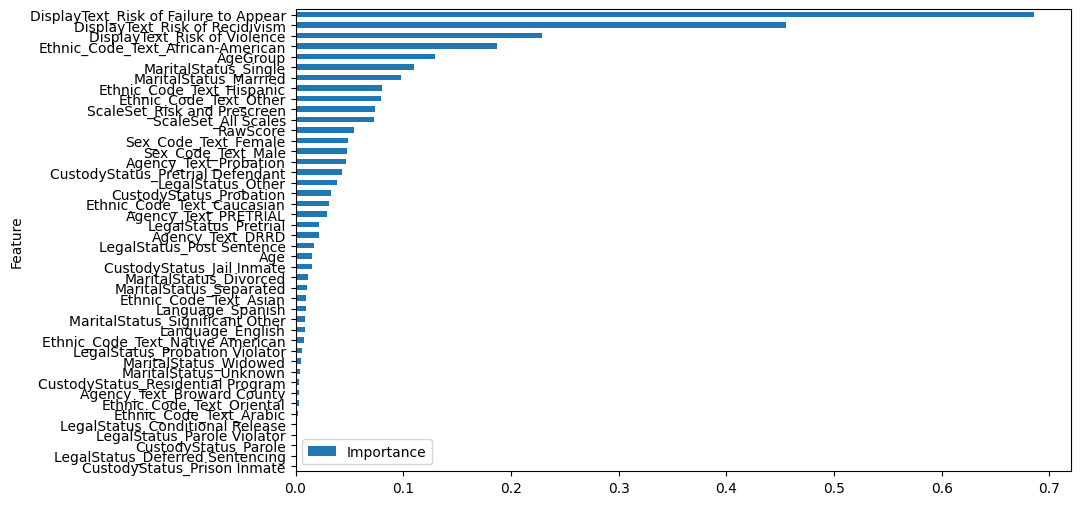

In [38]:
coefficients = logistic_model_scoretext.coef_

print("Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {coefficients[0, i]}")

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

### It can be seen that the 3 different Risk Text has a high feature importance, followed by the Raw Score, therefore, we will be diving deeper into each different Risk Text by splitting it into 3 different dataframes. We will also be checking if the Raw Score is correlated to the Decile Score/Score Text

## Check the correlation of raw score and decile score

In [39]:
#df_cleaned
condition_1 = df_cleaned['DisplayText'].isin(['Risk of Violence'])
condition_2 = df_cleaned['DisplayText'].isin(['Risk of Recidivism'])
condition_3 = df_cleaned['DisplayText'].isin(['Risk of Failure to Appear'])

df_1_violence = df_cleaned[condition_1].copy()
df_2_rec = df_cleaned[condition_2].copy()
df_3_failure = df_cleaned[condition_3].copy()

print("Dataframe 1:")
print(df_1_violence[['DisplayText','RawScore','DecileScore']])

print("Dataframe 2:")
print(df_2_rec[['DisplayText','RawScore','DecileScore']])

print("Dataframe 3:")
print(df_3_failure[['DisplayText','RawScore','DecileScore']])

Dataframe 1:
            DisplayText  RawScore  DecileScore
0      Risk of Violence     -2.08            4
3      Risk of Violence     -2.84            2
6      Risk of Violence     -1.20            8
9      Risk of Violence     -1.29            7
12     Risk of Violence     -2.90            2
...                 ...       ...          ...
60828  Risk of Violence     -1.61            6
60831  Risk of Violence     -2.50            3
60834  Risk of Violence     -3.12            1
60837  Risk of Violence     -2.03            4
60840  Risk of Violence     -2.75            2

[20271 rows x 3 columns]
Dataframe 2:
              DisplayText  RawScore  DecileScore
1      Risk of Recidivism     -1.06            2
4      Risk of Recidivism     -1.50            1
7      Risk of Recidivism      0.18            8
10     Risk of Recidivism     -0.53            6
13     Risk of Recidivism     -1.55            2
...                   ...       ...          ...
60829  Risk of Recidivism     -0.42      

In [40]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


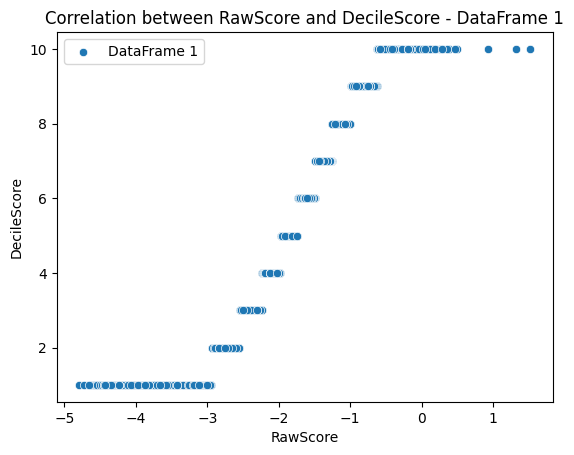

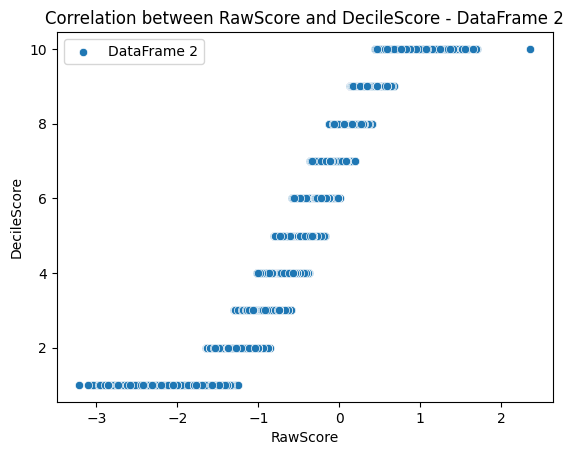

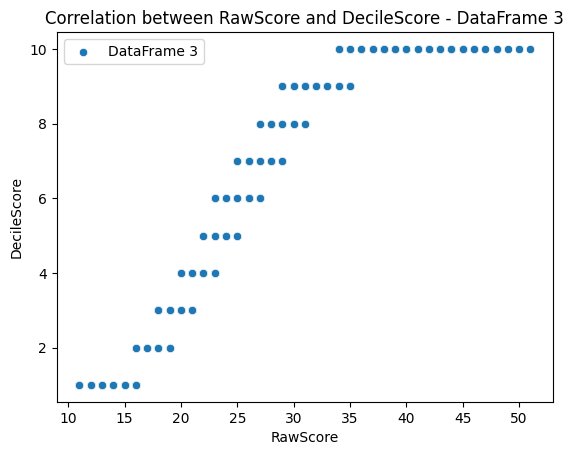

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation for DataFrame 1
sns.scatterplot(data=df_1_violence, x='RawScore', y='DecileScore', label='DataFrame 1')
plt.title('Correlation between RawScore and DecileScore - DataFrame 1')
plt.show()

# Plot correlation for DataFrame 2
sns.scatterplot(data=df_2_rec, x='RawScore', y='DecileScore', label='DataFrame 2')
plt.title('Correlation between RawScore and DecileScore - DataFrame 2')
plt.show()

# Plot correlation for DataFrame 3
sns.scatterplot(data=df_3_failure, x='RawScore', y='DecileScore', label='DataFrame 3')
plt.title('Correlation between RawScore and DecileScore - DataFrame 3')
plt.show()

### With this, we can see that the raw score is clearly correlated to the decile score, therefore we drop the raw score and decile score as it is all correlated to ScoreText

In [42]:
columns_to_drop = ['Person_ID','AssessmentID','Case_ID','LastName','FirstName','MiddleName','DateOfBirth','ScaleSet_ID','AssessmentReason','Screening_Date','RecSupervisionLevelText','Scale_ID','BirthYear','ScreeningYear','RecSupervisionLevel','RawScore','DecileScore','DisplayText','AssessmentType','IsCompleted','IsDeleted','Age']


df_violence = df_1_violence.drop(columns = columns_to_drop)
df_rec = df_2_rec.drop(columns = columns_to_drop)
df_failure = df_3_failure.drop(columns = columns_to_drop)

df_violence.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20271 entries, 0 to 60840
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Agency_Text       20271 non-null  object  
 1   Sex_Code_Text     20271 non-null  object  
 2   Ethnic_Code_Text  20271 non-null  object  
 3   ScaleSet          20271 non-null  object  
 4   Language          20271 non-null  object  
 5   LegalStatus       20271 non-null  object  
 6   CustodyStatus     20271 non-null  object  
 7   MaritalStatus     20271 non-null  object  
 8   ScoreText         20271 non-null  object  
 9   AgeGroup          20271 non-null  category
dtypes: category(1), object(9)
memory usage: 1.6+ MB


In [43]:
df_violence_enc = pd.get_dummies(df_violence, columns=['Agency_Text','Sex_Code_Text','Ethnic_Code_Text','ScaleSet','Language','LegalStatus','CustodyStatus','MaritalStatus'])
df_rec_enc = pd.get_dummies(df_rec, columns=['Agency_Text','Sex_Code_Text','Ethnic_Code_Text','ScaleSet','Language','LegalStatus','CustodyStatus','MaritalStatus'])
df_failure_enc = pd.get_dummies(df_failure, columns=['Agency_Text','Sex_Code_Text','Ethnic_Code_Text','ScaleSet','Language','LegalStatus','CustodyStatus','MaritalStatus'])

print(df_violence_enc)

      ScoreText AgeGroup  Agency_Text_Broward County  Agency_Text_DRRD  \
0           Low        1                       False             False   
3           Low        2                       False             False   
6          High        1                       False             False   
9        Medium        1                       False             False   
12          Low        2                       False             False   
...         ...      ...                         ...               ...   
60828    Medium        2                       False             False   
60831       Low        2                       False             False   
60834       Low        2                       False             False   
60837       Low        2                       False             False   
60840       Low        2                       False             False   

       Agency_Text_PRETRIAL  Agency_Text_Probation  Sex_Code_Text_Female  \
0                      True        

### Model for risk of violence

In [44]:
from sklearn.model_selection import train_test_split

target_column = 'ScoreText'

X = df_violence_enc.loc[:, df_violence_enc.columns != target_column]
y = df_violence_enc[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12162 entries, 17484 to 47415
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   AgeGroup                           12162 non-null  category
 1   Agency_Text_Broward County         12162 non-null  bool    
 2   Agency_Text_DRRD                   12162 non-null  bool    
 3   Agency_Text_PRETRIAL               12162 non-null  bool    
 4   Agency_Text_Probation              12162 non-null  bool    
 5   Sex_Code_Text_Female               12162 non-null  bool    
 6   Sex_Code_Text_Male                 12162 non-null  bool    
 7   Ethnic_Code_Text_African-American  12162 non-null  bool    
 8   Ethnic_Code_Text_Arabic            12162 non-null  bool    
 9   Ethnic_Code_Text_Asian             12162 non-null  bool    
 10  Ethnic_Code_Text_Caucasian         12162 non-null  bool    
 11  Ethnic_Code_Text_Hispanic          12162 n

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn

In [47]:
logistic_model_violence = LogisticRegression(solver='sag', max_iter=100, penalty="l2", C=C)

logistic_model_violence.fit(X_train,y_train)

LogisticRegression(C=0.001, solver='sag')

In [48]:
y_train_pred = logistic_model_violence.predict(X_train)

y_test_pred = logistic_model_violence.predict(X_test)

train_comparison = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})


print("Train Set - Actual vs Predicted:")
print(train_comparison)

print("\nTest Set - Actual vs Predicted:")
print(test_comparison)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('\nTrain Accuracy: {:.2f}%'.format(accuracy_train * 100))
print('Test Accuracy: {:.2f}%'.format(accuracy_test * 100))

Train Set - Actual vs Predicted:
       Actual Predicted
17484  Medium       Low
30381    High       Low
14166    High       Low
15153     Low       Low
6648     High       Low
...       ...       ...
33882  Medium       Low
35922     Low       Low
16188     Low       Low
2580      Low       Low
47415     Low       Low

[12162 rows x 2 columns]

Test Set - Actual vs Predicted:
       Actual Predicted
50697     Low       Low
35886  Medium       Low
54774     Low       Low
15075     Low       Low
29826     Low       Low
...       ...       ...
8298      Low       Low
29958    High       Low
19038     Low       Low
19515     Low       Low
46047     Low       Low

[8109 rows x 2 columns]

Train Accuracy: 74.20%
Test Accuracy: 74.37%


Coefficients:
AgeGroup: -0.24415885317020747
Agency_Text_Broward County: 0.0004779860033017255
Agency_Text_DRRD: 0.01564309407798814
Agency_Text_PRETRIAL: 0.05823450513856467
Agency_Text_Probation: -0.07435546792190041
Sex_Code_Text_Female: -0.07583982191113121
Sex_Code_Text_Male: 0.07583993920908677
Ethnic_Code_Text_African-American: 0.1452664626860486
Ethnic_Code_Text_Arabic: -0.0010983350480405032
Ethnic_Code_Text_Asian: -0.0038029255827972124
Ethnic_Code_Text_Caucasian: -0.09274641558635006
Ethnic_Code_Text_Hispanic: -0.030980419773224
Ethnic_Code_Text_Native American: 0.00233708184550744
Ethnic_Code_Text_Oriental: 0.0006583139584098122
Ethnic_Code_Text_Other: -0.019633645201600283
ScaleSet_All Scales: 0.08084597865252133
ScaleSet_Risk and Prescreen: -0.0808458613545656
Language_English: 0.0027528573416488117
Language_Spanish: -0.00275274004369446
LegalStatus_Conditional Release: -9.891053820656102e-05
LegalStatus_Deferred Sentencing: 0.0006342608769412187
LegalStatus_Other: -0.028

<Axes: ylabel='Feature'>

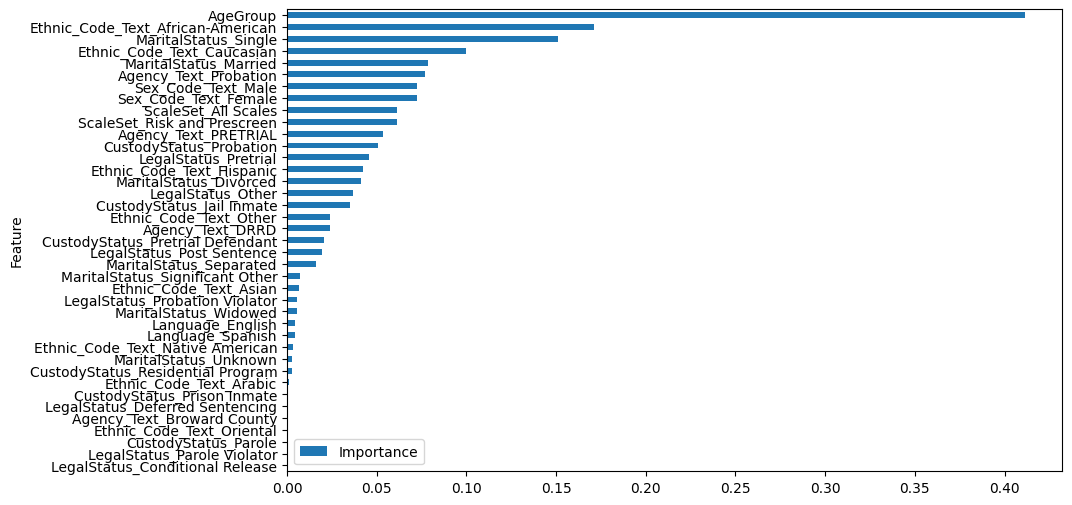

In [49]:
coefficients = logistic_model_violence.coef_

print("Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {coefficients[0, i]}")
    
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

### A high negative feature importance can be seen on Age Group can be seen, this is because as a person starts to get older, the less likely they are to commit a violence crime

### It can also be seen that the African American and Native American have a high positive feature importance, showing that there is a higher chance of someone committing a violent crime if they are of those ethnicity

## Model for Risk of Rec

In [50]:
from sklearn.model_selection import train_test_split

target_column = 'ScoreText'

X = df_rec_enc.loc[:, df_rec_enc.columns != target_column]
y = df_rec_enc[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [51]:
logistic_model_rec = LogisticRegression(solver='sag', max_iter=100, penalty="l2", C=C)

logistic_model_rec.fit(X_train,y_train)

LogisticRegression(C=0.001, solver='sag')

In [52]:
y_train_pred = logistic_model_rec.predict(X_train)

y_test_pred = logistic_model_rec.predict(X_test)

train_comparison = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})


print("Train Set - Actual vs Predicted:")
print(train_comparison)

print("\nTest Set - Actual vs Predicted:")
print(test_comparison)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('\nTrain Accuracy: {:.2f}%'.format(accuracy_train * 100))
print('Test Accuracy: {:.2f}%'.format(accuracy_test * 100))

Train Set - Actual vs Predicted:
       Actual Predicted
16372     Low       Low
41578     Low       Low
36658     Low       Low
58576     Low       Low
41377  Medium       Low
...       ...       ...
33931     Low       Low
35980     Low       Low
16210    High       Low
2584      Low       Low
47488     Low       Low

[12146 rows x 2 columns]

Test Set - Actual vs Predicted:
       Actual Predicted
22834    High       Low
1156     High       Low
6811   Medium       Low
9760     High       Low
54043     Low       Low
...       ...       ...
8842   Medium       Low
56581  Medium       Low
27451  Medium       Low
19951    High       Low
24460  Medium    Medium

[8098 rows x 2 columns]

Train Accuracy: 57.83%
Test Accuracy: 58.27%


Coefficients:
AgeGroup: -0.20869632320034828
Agency_Text_Broward County: 0.0013845182253220886
Agency_Text_DRRD: 0.014736896105904194
Agency_Text_PRETRIAL: 0.030280977854647766
Agency_Text_Probation: -0.04640312729491146
Sex_Code_Text_Female: -0.04829144605133645
Sex_Code_Text_Male: 0.04829071094229957
Ethnic_Code_Text_African-American: 0.22792022096130057
Ethnic_Code_Text_Arabic: -0.0019682014767592026
Ethnic_Code_Text_Asian: -0.006536105492861405
Ethnic_Code_Text_Caucasian: -0.10229838750559411
Ethnic_Code_Text_Hispanic: -0.07766425493040759
Ethnic_Code_Text_Native American: 0.0057617227106131555
Ethnic_Code_Text_Oriental: -0.00010528267961843434
Ethnic_Code_Text_Other: -0.04511044669571099
ScaleSet_All Scales: 0.07028559834137262
ScaleSet_Risk and Prescreen: -0.070286333450411
Language_English: 0.005698995476028053
Language_Spanish: -0.0056997305850647485
LegalStatus_Conditional Release: 0.0004331796858912461
LegalStatus_Deferred Sentencing: -0.0004023527436538675
LegalStatus_Other:

<Axes: ylabel='Feature'>

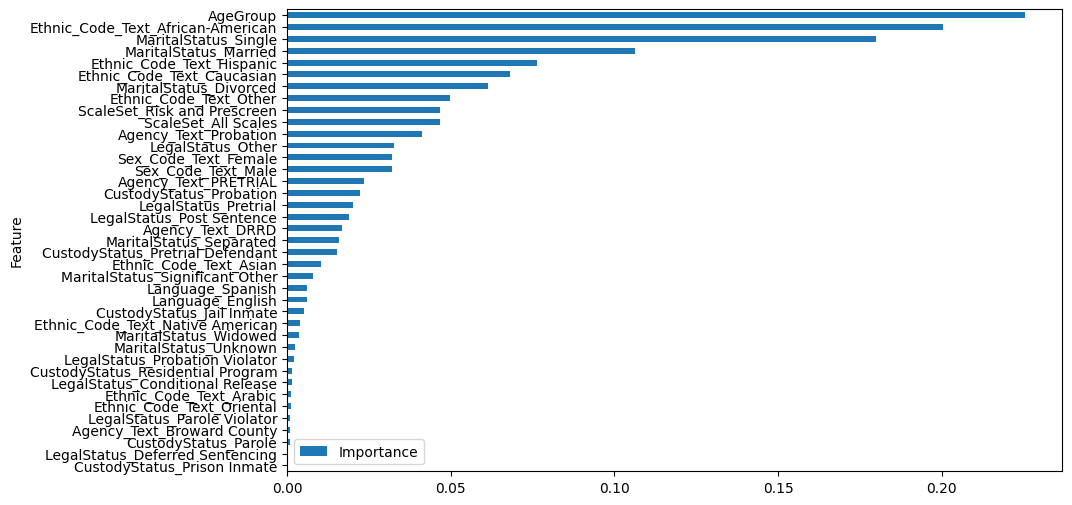

In [53]:
coefficients = logistic_model_rec.coef_

print("Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {coefficients[0, i]}")
    
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

### Model for risk of failure

In [54]:
from sklearn.model_selection import train_test_split

target_column = 'ScoreText'

X = df_failure_enc.loc[:, df_failure_enc.columns != target_column]
y = df_failure_enc[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [55]:
logistic_model_failure = LogisticRegression(solver='sag', max_iter=100, penalty="l2", C=C)

logistic_model_failure.fit(X_train,y_train)

LogisticRegression(C=0.001, solver='sag')

In [56]:
y_train_pred = logistic_model_failure.predict(X_train)

y_test_pred = logistic_model_failure.predict(X_test)

train_comparison = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})


print("Train Set - Actual vs Predicted:")
print(train_comparison)

print("\nTest Set - Actual vs Predicted:")
print(test_comparison)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('\nTrain Accuracy: {:.2f}%'.format(accuracy_train * 100))
print('Test Accuracy: {:.2f}%'.format(accuracy_test * 100))

Train Set - Actual vs Predicted:
       Actual Predicted
54365     Low       Low
21230    High       Low
25514     Low       Low
8294      Low       Low
29954     Low       Low
...       ...       ...
33857     Low       Low
35897     Low       Low
16175  Medium       Low
2582   Medium       Low
47390     Low       Low

[12168 rows x 2 columns]

Test Set - Actual vs Predicted:
      Actual Predicted
33311   High       Low
18884    Low       Low
20759    Low       Low
57119    Low       Low
11852    Low       Low
...      ...       ...
6176     Low       Low
49397    Low       Low
40043    Low       Low
28538    Low       Low
15299    Low       Low

[8112 rows x 2 columns]

Train Accuracy: 75.06%
Test Accuracy: 75.06%


Coefficients:
AgeGroup: 0.09967534885931734
Agency_Text_Broward County: 0.003937404802072195
Agency_Text_DRRD: 0.0012334663669838293
Agency_Text_PRETRIAL: 0.015335104845812447
Agency_Text_Probation: -0.02050620605155013
Sex_Code_Text_Female: -0.024728493396878642
Sex_Code_Text_Male: 0.02472826336019677
Ethnic_Code_Text_African-American: 0.05680344048448686
Ethnic_Code_Text_Arabic: -2.1276522411074273e-06
Ethnic_Code_Text_Asian: -0.002903662420568629
Ethnic_Code_Text_Caucasian: 0.015359828210834262
Ethnic_Code_Text_Hispanic: -0.04629127737887849
Ethnic_Code_Text_Native American: 0.0007755994653070883
Ethnic_Code_Text_Oriental: -0.00027169475831232315
Ethnic_Code_Text_Other: -0.0234703359873085
ScaleSet_All Scales: 0.028465365493774347
ScaleSet_Risk and Prescreen: -0.028465595530456446
Language_English: 0.002736529506376516
Language_Spanish: -0.0027367595430581684
LegalStatus_Conditional Release: 0.003915357895809881
LegalStatus_Deferred Sentencing: 0.0007779741709658823
LegalStatus_Othe

<Axes: ylabel='Feature'>

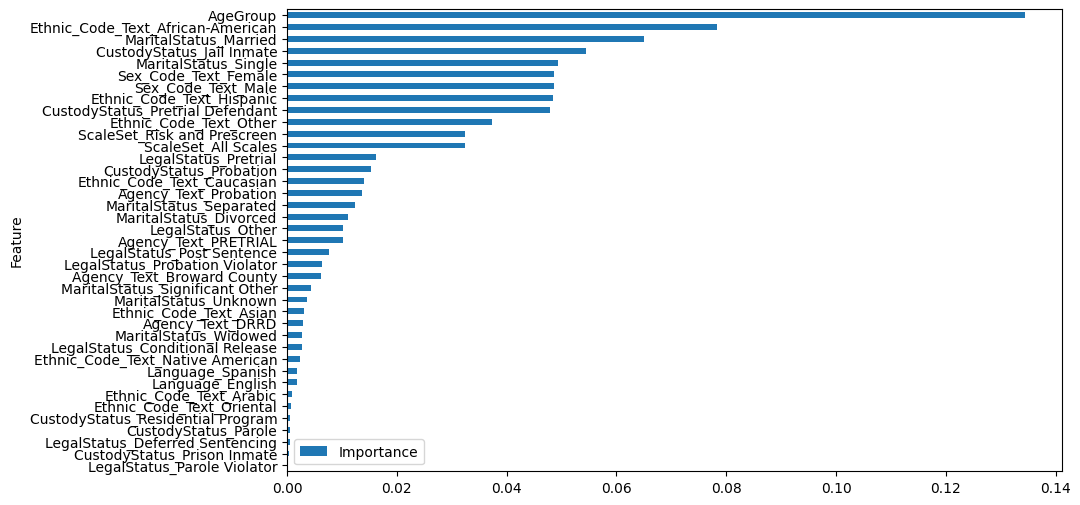

In [57]:
coefficients = logistic_model_failure.coef_

print("Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {coefficients[0, i]}")
    
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))